In [5]:
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm
font_name=fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc('font', family=font_name)

df1=pd.read_csv('./data/서울시 인구현황_구.txt', sep='\t', header=1)
df1=df1.iloc[:, [0,1,6,7,9,10]]
df1.drop(0, inplace=True)

In [6]:
### 컬럼 이름 변경하기
col_name=['년도', '자치구', '내국인(남)', '내국인(여)','외국인(남)','외국인(여)']
for i in range(len(col_name)):
    df1.rename(columns={df1.columns[i]:col_name[i]}, inplace=True)

In [7]:
### 데이터 중 "…" 값 제거하기 / 1991년 데이터 삭제
df1=df1[df1['내국인(남)']!="…"]

In [8]:
### 콤마(,) 제거하기
df1['내국인(남)']=df1['내국인(남)'].str.replace(",","")
df1['내국인(여)']=df1['내국인(여)'].str.replace(",","")
df1['외국인(남)']=df1['외국인(남)'].str.replace(",","")
df1['외국인(여)']=df1['외국인(여)'].str.replace(",","")

출력 조건 입력(년도별:1, 자치구별:2): 2


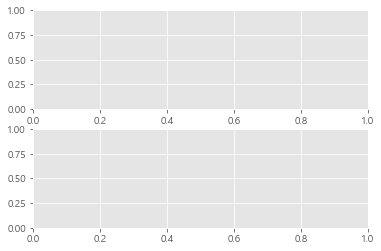

조회 자치구 입력: 중구


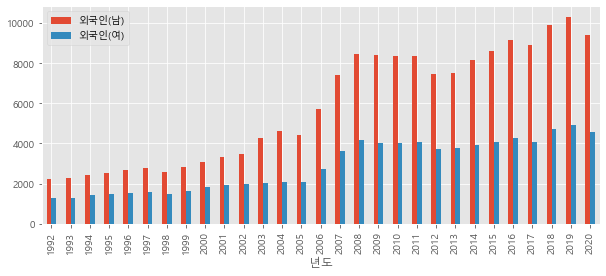

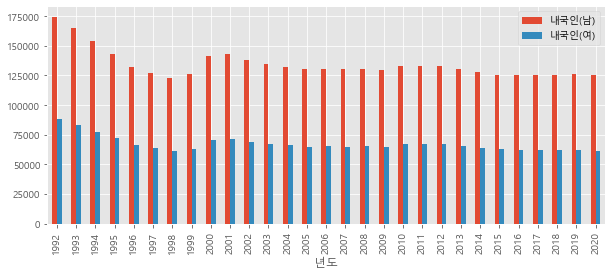

In [11]:
### 숫자형 데이터 변경하기
df1=df1.astype({'내국인(남)':'int64','내국인(여)':'int64','외국인(남)':'int64','외국인(여)':'int64'})
#print(df1.dtypes)

cho=input('출력 조건 입력(년도별:1, 자치구별:2): ')
plt.style.use('ggplot')



if cho == "1":
    ### 년도별 조회(합계 제외)
    inYear=input('조회 년도 입력: ')
    df2 = df1[(df1['년도'] == inYear) & (df1['자치구'] != '합계')]  # 합계 제외
    df2['외국인']=df2['외국인(남)']+df2['외국인(여)']
    df2.plot(kind='bar', x='자치구', y=['외국인(남)', '외국인(여)'], figsize=(10, 4))
    df2.plot(kind='bar', x='자치구', y=['외국인'], figsize=(10, 4))

elif cho=="2":
    ### 자치구별 조회
    ingu = input('조회 자치구 입력: ')
    df2=df1[df1['자치구'] == ingu]
    df2.plot(kind='bar', x='년도', y=['외국인(남)', '외국인(여)'], figsize=(10, 4))
    df2.plot(kind='bar', x='년도', y=['내국인(남)', '내국인(여)'], figsize=(10, 4))
else:
    print('1과 2중 하나만 입력하세요.')
    exit()

plt.show()